In [1]:
import torch


import processing

import get_data

import matplotlib.pyplot as plt

import numpy as np
import os

In [2]:
# chose the scene 

test_scene = 1  # can be 1,2,3
layers = 8 

In [3]:
# read in the scene

data_folder   = "Data/Set"+str(test_scene) #put in path to the scene dir

LF            = get_data.read_lightfield(data_folder)
param_dict    = get_data.read_parameters(data_folder)
depth_map     = get_data.read_depth(data_folder, highres=False)
depth_all_map = get_data.read_all_depths(data_folder, highres=False)

images     = torch.from_numpy(LF).permute([0,1,4,2,3]).float()/255.
depth_maps = torch.from_numpy(depth_all_map)

param_dict['baselineMM']=param_dict['baseline_mm']*10
param_dict['focalLength'] = param_dict['focal_length_mm']
param_dict['sensorWidthMM'] = param_dict['sensor_size_mm']

In [4]:
img1_pos = [2,2]
img2_pos = [2,6]
target_pos = [2,4]

param_dict['psv_center_1_pose']=img1_pos
param_dict['psv_center_2_pose']=img2_pos
param_dict['target_image_pose']=target_pos
depthmap1 = depth_maps[img1_pos[0],img1_pos[1]]
depthmap2 = depth_maps[img2_pos[0],img2_pos[1]]

img1= images[img1_pos[0],img1_pos[1]]
img2= images[img2_pos[0],img2_pos[1]]

param_dict['mpi_1_min_disp']=1/depthmap1.max()
param_dict['mpi_2_min_disp']=1/depthmap2.max()

param_dict['mpi_1_bin_size']=((1/depthmap1).max()-(1/depthmap1).min())/layers
param_dict['mpi_2_bin_size']=((1/depthmap2).max()-(1/depthmap2).min())/layers

In [5]:
depth_tensors = torch.zeros((9,9,512,512,layers))
for i in range(9):
    for j in range(9):
        depth_tensors[i,j] = processing.create_disp_tensor(depth_maps[i,j], layers)[0]
        
        
rgba = torch.zeros((9,9,4,512,512,layers))
for i in range(9):
    for j in range(9):
        rgba[i,j] = processing.rgba(images[i,j], depth_tensors[i,j])
        

rgba1= rgba[img1_pos[0],img1_pos[1]]
rgba2= rgba[img2_pos[0],img2_pos[1]]

mpis = torch.stack([rgba1, rgba2], dim=0)

In [6]:
%%time


target_mpis = processing.homography(mpis, param_dict)

rgba1tot = processing.back_to_front_alphacomposite(target_mpis[0])
rgba2tot = processing.back_to_front_alphacomposite(target_mpis[1])



Wall time: 244 ms


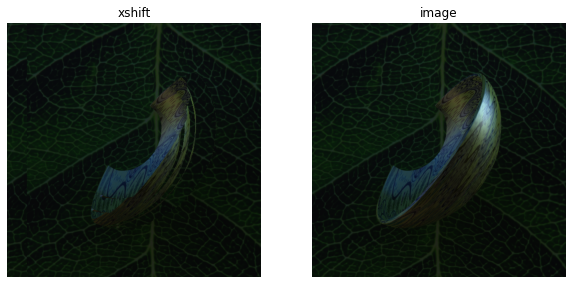

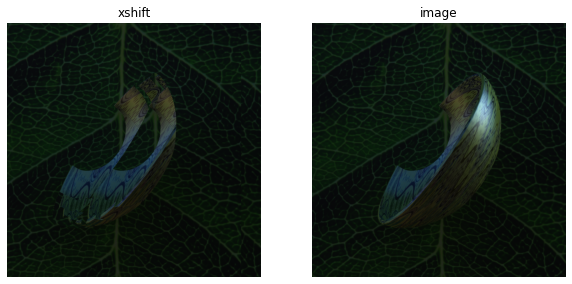

In [7]:
img1tot = rgba1tot[0:3].permute([1,2,0]).numpy()
img2tot = rgba2tot[0:3].permute([1,2,0]).numpy()

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(img1tot)
axs[0].axis('off')
axs[0].set_title('xshift')
axs[1].imshow(LF[img1_pos[0],img1_pos[1]])
axs[1].axis('off')
axs[1].set_title('image')
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(img2tot)
axs[0].axis('off')
axs[0].set_title('xshift')
axs[1].imshow(LF[img2_pos[0],img2_pos[1]])
axs[1].axis('off')
axs[1].set_title('image')
plt.show()

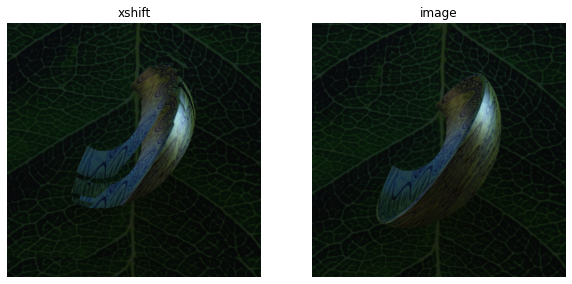

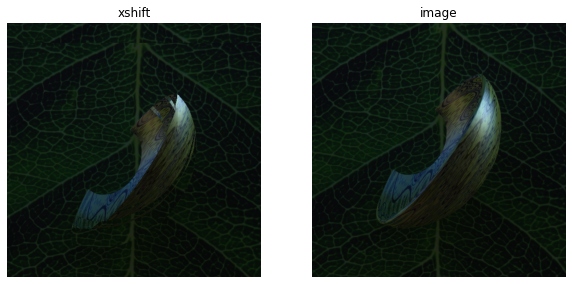

In [8]:
img1_pos = [2,2]
img2_pos = [6,2]
target_pos = [4,2]

param_dict['psv_center_1_pose']=img1_pos
param_dict['psv_center_2_pose']=img2_pos
param_dict['target_image_pose']=target_pos
depthmap1 = depth_maps[img1_pos[0],img1_pos[1]]
depthmap2 = depth_maps[img2_pos[0],img2_pos[1]]

img1= images[img1_pos[0],img1_pos[1]]
img2= images[img2_pos[0],img2_pos[1]]

param_dict['mpi_1_min_disp']=1/depthmap1.max()
param_dict['mpi_2_min_disp']=1/depthmap2.max()

param_dict['mpi_1_bin_size']=((1/depthmap1).max()-(1/depthmap1).min())/layers
param_dict['mpi_2_bin_size']=((1/depthmap2).max()-(1/depthmap2).min())/layers

depth_tensors = torch.zeros((9,9,512,512,layers))
for i in range(9):
    for j in range(9):
        depth_tensors[i,j] = processing.create_disp_tensor(depth_maps[i,j], layers)[0]
        
        
rgba = torch.zeros((9,9,4,512,512,layers))
for i in range(9):
    for j in range(9):
        rgba[i,j] = processing.rgba(images[i,j], depth_tensors[i,j])
        

rgba1= rgba[img1_pos[0],img1_pos[1]]
rgba2= rgba[img2_pos[0],img2_pos[1]]

mpis = torch.stack([rgba1, rgba2], dim=0)

target_mpis = processing.homography(mpis, param_dict)

rgba1tot = processing.back_to_front_alphacomposite(target_mpis[0])
rgba2tot = processing.back_to_front_alphacomposite(target_mpis[1])

img1tot = rgba1tot[0:3].permute([1,2,0]).numpy()
img2tot = rgba2tot[0:3].permute([1,2,0]).numpy()

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(img1tot)
axs[0].axis('off')
axs[0].set_title('xshift')
axs[1].imshow(LF[img1_pos[0],img1_pos[1]])
axs[1].axis('off')
axs[1].set_title('image')
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(img2tot)
axs[0].axis('off')
axs[0].set_title('xshift')
axs[1].imshow(LF[img2_pos[0],img2_pos[1]])
axs[1].axis('off')
axs[1].set_title('image')
plt.show()
